<a href="https://colab.research.google.com/github/aaryan-gulia/UCLBnF-Algorithmic-Research/blob/main/Algo_Trading_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction to Algo Trading in Cryptocurrency

## What is Algorithmic Trading?
Algorithmic trading involves using computer algorithms to automate the process of buying and selling financial assets.

## Advantages of Crypto Algo Trading
- Speed and precision in execution.
- Reduced emotional trading.
- Data based trading and risk-management.

## Challenges in Crypto Algo Trading
- Data biases.
- False positives and back-testing challange.
- Strategy research and selection challange.


## Understanding the Crypto Market Data

- Try to re-write this notebook with different time-frames and crypto assets. This should get you a strong technique over understanding different data-sets better using tools provided in pandas, matplotlib, and plotly

### Libraries used
!pip install requests <br>
!pip install pandas <br>
!pip install numpy <br>
!pip install plotly <br>
!pip install matplotlib

In [3]:
import requests
import pandas as pd
import numpy as np

In [4]:
# Define trading pair and timeframe
symbol = 'BTCUSD'
timeframe = '1440' #in minutes

# Fetch OHLCV data from Kraken
url = f'https://api.kraken.com/0/public/OHLC?pair={symbol}&interval={timeframe}'

In [5]:
# Make the API request
response = requests.get(url)
data = response.json()

# Extract OHLCV data
ohlc_data = data['result']['XXBTZUSD']

# Convert the data to a DataFrame
columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'wavg price', 'count']
df = pd.DataFrame(ohlc_data, columns=columns)

# Display the first few rows of the raw data
df.head() #always use this to get a quick look at your data

,timestamp,open,high,low,close,volume,wavg price,count
0,1639008000,50525.1,50819.5,47298.4,47581.6,48805.4,2691.49981080,30424
1,1639094400,47576.4,50114.2,46888.8,47218.3,48261.3,3323.54175580,34264
2,1639180800,47173.9,49500.0,46800.0,49367.2,48521.7,2068.41677139,23586
3,1639267200,49406.0,50788.4,48697.8,50113.2,49746.9,2022.36398205,22650
4,1639353600,50098.8,50219.8,45759.0,46732.2,47604.1,4915.42307275,41085


In [6]:
# Convert Unix timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

df.head()


,timestamp,open,high,low,close,volume,wavg price,count
0,2021-12-09,50525.1,50819.5,47298.4,47581.6,48805.4,2691.49981080,30424
1,2021-12-10,47576.4,50114.2,46888.8,47218.3,48261.3,3323.54175580,34264
2,2021-12-11,47173.9,49500.0,46800.0,49367.2,48521.7,2068.41677139,23586
3,2021-12-12,49406.0,50788.4,48697.8,50113.2,49746.9,2022.36398205,22650
4,2021-12-13,50098.8,50219.8,45759.0,46732.2,47604.1,4915.42307275,41085


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
timestamp     0
open          0
high          0
low           0
close         0
volume        0
wavg price    0
count         0
dtype: int64


In [8]:
# Descriptive statistics
statistics = df.describe()
print("\nDescriptive Statistics:")
print(statistics)

# note that this function will only return statistics for numerical values
# in this case we can conclude that the other data points are in string format
# and need to be converted - done in next cell


Descriptive Statistics:
               count
count     720.000000
mean    28778.841667
std     13444.444879
min      2386.000000
25%     20262.500000
50%     25386.000000
75%     33562.000000
max    102910.000000


In [9]:
# Convert 'open', 'high', 'low', 'close', 'volume', 'wavg_price' to numeric type
string_columns = ['open', 'high', 'low', 'close', 'volume', 'wavg price']

df[string_columns] = df[string_columns].apply(pd.to_numeric, errors='coerce')

df.head()

,timestamp,open,high,low,close,volume,wavg price,count
0,2021-12-09,50525.1,50819.5,47298.4,47581.6,48805.4,2691.499811,30424
1,2021-12-10,47576.4,50114.2,46888.8,47218.3,48261.3,3323.541756,34264
2,2021-12-11,47173.9,49500.0,46800.0,49367.2,48521.7,2068.416771,23586
3,2021-12-12,49406.0,50788.4,48697.8,50113.2,49746.9,2022.363982,22650
4,2021-12-13,50098.8,50219.8,45759.0,46732.2,47604.1,4915.423073,41085


In [10]:
# Descriptive statistics
statistics = df.describe()
print("\nDescriptive Statistics:")
print(statistics)


Descriptive Statistics:
               open          high           low         close        volume  \
count    720.000000    720.000000    720.000000    720.000000    720.000000   
mean   28540.881806  29115.646250  27936.550000  28522.350000  28525.538333   
std     8645.478238   8850.071034   8414.731587   8612.409324   8623.204310   
min    15759.700000  16277.600000  15470.500000  15760.000000  15938.500000   
25%    21401.475000  21844.150000  20876.075000  21401.650000  21351.450000   
50%    27218.300000  27652.050000  26723.900000  27218.850000  27195.600000   
75%    34513.450000  35000.125000  33879.625000  34513.450000  34431.125000   
max    50834.200000  52111.000000  50480.200000  50834.300000  51236.200000   

         wavg price          count  
count    720.000000     720.000000  
mean    3339.363074   28778.841667  
std     2352.850539   13444.444879  
min      233.276341    2386.000000  
25%     1840.095367   20262.500000  
50%     2788.320063   25386.000000  
75% 

In [11]:
import plotly.graph_objects as go

In [12]:
# Plot interactive candlestick graph of BTC/USD data points

# the .Figure function will make the figure. it needs the dats as required by our graph.
fig = go.Figure(data=[go.Candlestick(x=df['timestamp'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

# .update_layout function can be used to make chages to layout of a figure, add axis names,
# change slider settings, and various other options - look into documentation for all the
# options!
fig.update_layout(title='BTC/USD OHLC Candlestick',
                  xaxis_title='Date',
                  yaxis_title='Price',
                  xaxis_rangeslider_visible=False)

fig.show()

In [13]:
# Plotting a bar chart for trading volume
import plotly.express as px


fig_volume = px.bar(df, x='timestamp', y='volume', title='BTC/USD Trading Volume')
fig_volume.update_xaxes(title_text='Date')
fig_volume.update_yaxes(title_text='Volume')
# note that we could have also used the functions used in the previous graph here

fig_volume.show()

### Gain deeper understanding of the data

In [14]:
# Calculating and plotting a 30-period Simple Moving Average (SMA)

# .rolling() function makes sure that we get a moving average for each day after the frist window
df['sma_30'] = df['close'].rolling(window=30).mean()
df['sma_60'] = df['close'].rolling(window=60).mean()

# Plotting the original closing prices and SMA
fig_sma = go.Figure()

# In this we make the figure without any data and add the data points through the add_trace function.
# This can be used to add any graph - you can make multiple plots in the same graph to understand
# how various data points interact
fig_sma.add_trace(go.Scatter(x=df['timestamp'], y=df['close'], mode='lines', name='Closing Price'))
fig_sma.add_trace(go.Scatter(x=df['timestamp'], y=df['sma_30'], mode='lines', name='30-day SMA'))
fig_sma.add_trace(go.Scatter(x=df['timestamp'], y=df['sma_60'], mode='lines', name='60-day SMA'))

fig_sma.update_layout(title='BTC/USD Closing Price and 30-day SMA',
                     xaxis_title='Date',
                     yaxis_title='Price')

fig_sma.show()

In [15]:
# Calculating daily percentage changes and plotting volatility

# use .pct_change() to get the rolling % change (daily returns in our case)
df['daily_return'] = df['close'].pct_change()

# Plotting volatility
fig_volatility = px.line(df, x='timestamp', y='daily_return', title='BTC/USD Daily Percentage Return')
fig_volatility.update_xaxes(title_text='Date')
fig_volatility.update_yaxes(title_text='Daily Return')

fig_volatility.show()

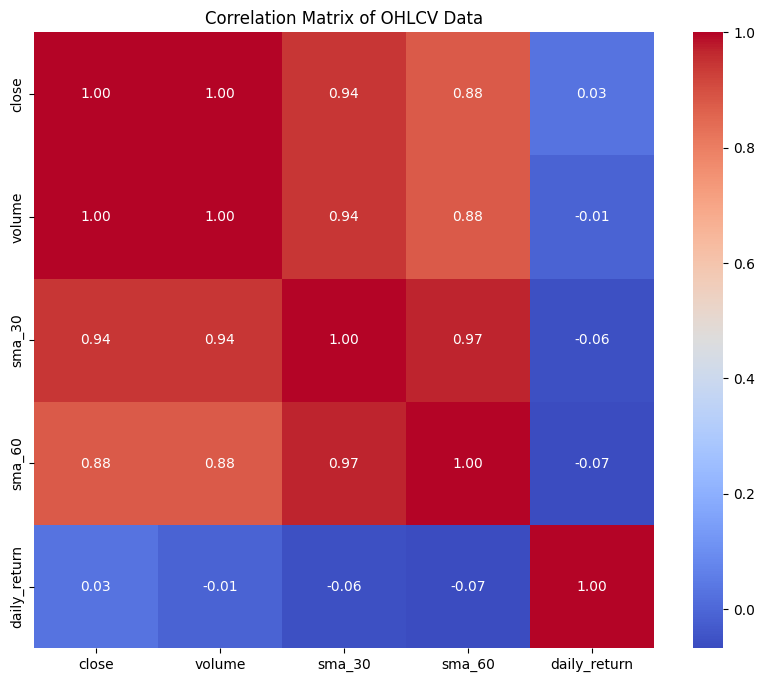

In [16]:
# Calculating and visualizing the correlation matrix
correl_columns = ['close','volume','sma_30','sma_60','daily_return']

# .corr() is a useful function to quickly get a view of how much your data in correlated
correlation_matrix = df[correl_columns].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of OHLCV Data')
plt.show()

## Strategy Development

### Common crypto algorithmic trading strategies:

#### *A. Trend Following Strategies* <br>
**Moving Averages:** Use of moving average crossovers to identify trend directions. <br>
**Bollinger Bands:** Identify overbought or oversold conditions in a market. <br> <br>

#### *B. Mean Reversion Strategies* <br>
**Statistical Arbitrage:** Exploit price divergences between related assets. Identifies assets that historically move together and take advantage of temporary dislocations. This may involve *cointegration tests, correlation analysis, and implementing a mean-reverting strategy*. <br>
**Pairs Trading:** Trade on the relative performance of two correlated assets. Simple application would be to identify pairs of assets that historically move together. When the spread between them deviates (to some standard deviation), take opposite positions. <br> <br>

#### *C. Momentum Strategies* <br>
**Relative Strength Index (RSI):** RSI measures the speed and change of price movements. RSI values above 70 could indicate overbought conditions, while values below 30 may indicate oversold conditions. <br>
**Ichimoku Cloud:** Ichimoku Cloud is a trend-following indicator. It consists of multiple lines that help identify trends, support/resistance levels, and potential future price movements. <br> <br>

#### *D. Arbitrage Strategies* <br>
**Cryptocurrency Arbitrage:** Exploit price differences between different exchanges. This generally requires HFT like set-ups and can benefit from intra-platform connectivity and networking. <br>
**Triangular Arbitrage:** Profit from price differences within a set of three currencies. Employes execution of a series of trades between three currencies to exploit pricing inefficiencies. Involves calculating *cross rates* and determining profitable triangular paths. <br> <br>

#### *E. Machine Learning-Based Strategies* <br>
**Predictive Modelling** <br>
**Reinforcement Learning** <br>
**Deep Learning** <br> <br>

Simpler Algorithmic models tend to outperform highly complicated models with a lot of assumptions and adjustable variables.

### Implementing a Simple Moving Average cross-over strategy

In [17]:
# Calculate 30-day and 60-day SMAs
df['sma_30'] = df['close'].rolling(window=30).mean()
df['sma_60'] = df['close'].rolling(window=60).mean()

In [18]:
# Generate buy/sell signals based on the crossover
df['signal'] = 0  # 0 indicates no signal
df['signal'][df['sma_30'] > df['sma_60']] = 1  # 1 indicates a buy signal
df['signal'][df['sma_30'] < df['sma_60']] = -1  # -1 indicates a sell signal

<ipython-input-18-0e69536401c6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-18-0e69536401c6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
# Calculate daily percentage returns
df['daily_return'] = df['close'].pct_change()

# Shift the signals by one day to avoid look-ahead bias
df['signal'] = df['signal'].shift(1)

# Backtesting
df['strategy_returns'] = df['signal'] * df['daily_return']

# Calculative cumulative returns. .cumprod() takes a cumulative product.
# the product of all (1 + daily returns) - 1 is the net return.
df['cumulative_strategy_returns'] = (1 + df['strategy_returns']).cumprod() - 1
df['cumulative_market_returns'] = (1 + df['daily_return']).cumprod() - 1

In [20]:
# Counting Winning and losing trades

# This can probably be done better. Feel free to change it as long as your
# answers are correct.
def trade_returns(signal, strat_returns):
  strat_returns = list(strat_returns)
  j = 0
  cumulative_trade_return = 0
  winners = 0
  losers = 0
  counter = 0
  for i in signal:
    if i != j:
      if (cumulative_trade_return > 0):
        winners += 1
      else:
        losers += 1
      cumulative_trade_return = 0
    else:
      cumulative_trade_return += strat_returns[counter]
    j = i
    counter += 1

  return winners, losers

In [21]:
# Performance Metrics
total_trades = np.sum(df['signal'].diff() != 0)
winning_trades, losing_trades = trade_returns(df['signal'],df['strategy_returns'])
win_rate = winning_trades / total_trades

average_daily_return = df['daily_return'].mean()
average_strategy_return = df['strategy_returns'].mean()

volatility = df['daily_return'].std()
strategy_volatility = df['strategy_returns'].std()

sharpe_ratio = (average_strategy_return / strategy_volatility) * np.sqrt(252)

In [22]:
df.dropna(inplace = True)
df.set_index(['timestamp'],inplace = True)

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

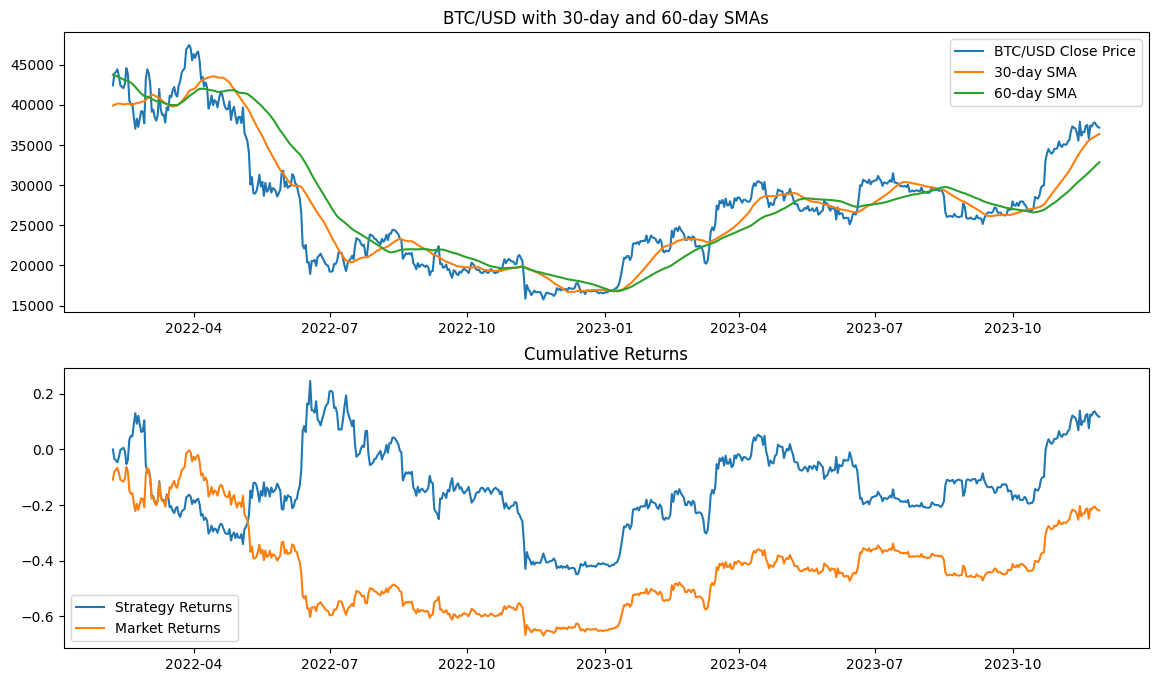

In [25]:
# Visualization
plt.figure(figsize=(14, 8)) # set the size of the figure using figsize parameter. Remove it and see the effect.

# .subplot() can be used when multiple graphs are to be made, positioned in a table.
# the arguments are the position of the given plot in the table.
plt.subplot(2, 1, 1)

# We can use the .plot() function to add any number of plots in the current graph
plt.plot(df['close'], label='BTC/USD Close Price')
plt.plot(df['sma_30'], label='30-day SMA')
plt.plot(df['sma_60'], label='60-day SMA')
plt.title('BTC/USD with 30-day and 60-day SMAs')
#use .legend() to print the legen on the given graph
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['cumulative_strategy_returns'], label='Strategy Returns')
plt.plot(df['cumulative_market_returns'], label='Market Returns')
plt.title('Cumulative Returns')
plt.legend()

plt.show()

In [26]:
# Display Performance Metrics
print("Total Trades:", total_trades)
print("Winning Trades:", winning_trades)
print("Losing Trades:", losing_trades)
print("Win Rate:", win_rate)
print("Average Daily Return:", average_daily_return)
print("Average Strategy Return:", average_strategy_return)
print("Volatility:", volatility)
print("Strategy Volatility:", strategy_volatility)
print("Sharpe Ratio:", sharpe_ratio)

Total Trades: 16
Winning Trades: 3
Losing Trades: 13
Win Rate: 0.1875
Average Daily Return: 8.210197881236134e-05
Average Strategy Return: 0.0005370837587319307
Volatility: 0.029127834000163052
Strategy Volatility: 0.02767060894875372
Sharpe Ratio: 0.3081226137339139


### Linear Regression-Based Multi-Asset Trading Strategy

This is supposed to be a brief overview of a deep world of machine-learning models.
Here's a great resource to learn more:
https://www.linkedin.com/learning/practical-python-for-algorithmic-trading/compute-machine-learning-classification-model?u=69919578

In [27]:
# Extracting and pre-processing data for ETH/USD and BTC/USD using the methods described above
eth_symbol = 'ETHUSD'
btc_symbol = 'BTCUSD'
timeframe = '1440'
eth_url = f'https://api.kraken.com/0/public/OHLC?pair={eth_symbol}&interval={timeframe}'
btc_url = f'https://api.kraken.com/0/public/OHLC?pair={btc_symbol}&interval={timeframe}'
eth_response = requests.get(eth_url)
eth_data = eth_response.json()
eth_ohlc_data = eth_data['result']['XETHZUSD']
btc_response = requests.get(btc_url)
btc_data = btc_response.json()
btc_ohlc_data = btc_data['result']['XXBTZUSD']


eth_columns = ['timestamp', 'eth_open', 'eth_high', 'eth_low', 'eth_close', 'eth_volume', 'eth_wavg_price', 'eth_count']
btc_columns = ['timestamp', 'btc_open', 'btc_high', 'btc_low', 'btc_close', 'btc_volume', 'btc_wavg_price', 'btc_count']
df_eth = pd.DataFrame(eth_ohlc_data, columns=eth_columns)
df_btc = pd.DataFrame(btc_ohlc_data, columns=btc_columns)

# Concatenate ETH and BTC data frames using .concat()
df_eth = df_eth.drop(columns=['timestamp'])
df = pd.concat([df_btc,df_eth], axis=1, join='inner')

#pre-processing
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
string_columns = ['eth_open', 'eth_high', 'eth_low', 'eth_close', 'eth_volume', 'eth_wavg_price','btc_open', 'btc_high', 'btc_low', 'btc_close', 'btc_volume', 'btc_wavg_price']
df[string_columns] = df[string_columns].apply(pd.to_numeric, errors='coerce')

# Display the first few rows with converted numerical columns
df.head()


,timestamp,btc_open,btc_high,btc_low,btc_close,btc_volume,btc_wavg_price,btc_count,eth_open,eth_high,eth_low,eth_close,eth_volume,eth_wavg_price,eth_count
0,2021-12-09,50525.1,50819.5,47298.4,47581.6,48805.4,2691.499811,30424,4439.83,4497.70,4075.48,4106.45,4258.44,43557.891661,34294
1,2021-12-10,47576.4,50114.2,46888.8,47218.3,48261.3,3323.541756,34264,4106.13,4238.00,3889.00,3901.90,4053.04,47555.087612,40000
2,2021-12-11,47173.9,49500.0,46800.0,49367.2,48521.7,2068.416771,23586,3901.90,4097.91,3833.36,4088.80,3998.38,30223.126620,29620
3,2021-12-12,49406.0,50788.4,48697.8,50113.2,49746.9,2022.363982,22650,4090.65,4176.99,3990.00,4133.54,4083.39,25941.880658,20793
4,2021-12-13,50098.8,50219.8,45759.0,46732.2,47604.1,4915.423073,41085,4133.08,4145.54,3665.41,3783.38,3840.96,50157.673719,41647


In [28]:
# Feature Engineering
df['btc_daily_return'] = df['btc_close'].pct_change()
df['eth_daily_return'] = df['eth_close'].pct_change()

df['btc_volatility'] = df['btc_daily_return'].rolling(window=30).std()
df['eth_volatility'] = df['eth_daily_return'].rolling(window=30).std()

# Drop NaN values introduced by the rolling calculation
df.dropna(inplace=True)
df.head()

,timestamp,btc_open,btc_high,btc_low,btc_close,btc_volume,btc_wavg_price,btc_count,eth_open,eth_high,eth_low,eth_close,eth_volume,eth_wavg_price,eth_count,btc_daily_return,eth_daily_return,btc_volatility,eth_volatility
30,2022-01-08,41523.7,42302.4,40555.0,41693.2,41337.0,2564.736854,24823,3197.02,3246.58,2999.08,3080.14,3089.55,37236.531046,26464,0.004084,-0.036481,0.029225,0.033842
31,2022-01-09,41693.2,42786.7,41249.7,41862.9,41964.8,2006.614580,16220,3080.15,3210.00,3060.38,3151.30,3139.40,24690.103035,20008,0.004070,0.023103,0.029253,0.033424
32,2022-01-10,41867.1,42239.6,39659.9,41855.3,41104.0,4131.282282,29925,3150.86,3180.30,2931.53,3084.65,3037.70,42048.826482,27371,-0.000182,-0.021150,0.027760,0.031887
33,2022-01-11,41855.2,43127.5,41315.5,42728.8,42374.3,3316.849061,27218,3083.49,3264.43,3054.64,3240.40,3173.60,37211.476760,25045,0.020870,0.050492,0.027924,0.033510
34,2022-01-12,42728.8,44348.5,42480.0,43927.8,43529.2,2847.971732,25374,3240.39,3412.64,3206.93,3373.77,3313.14,24087.804359,18939,0.028061,0.041158,0.025920,0.031321


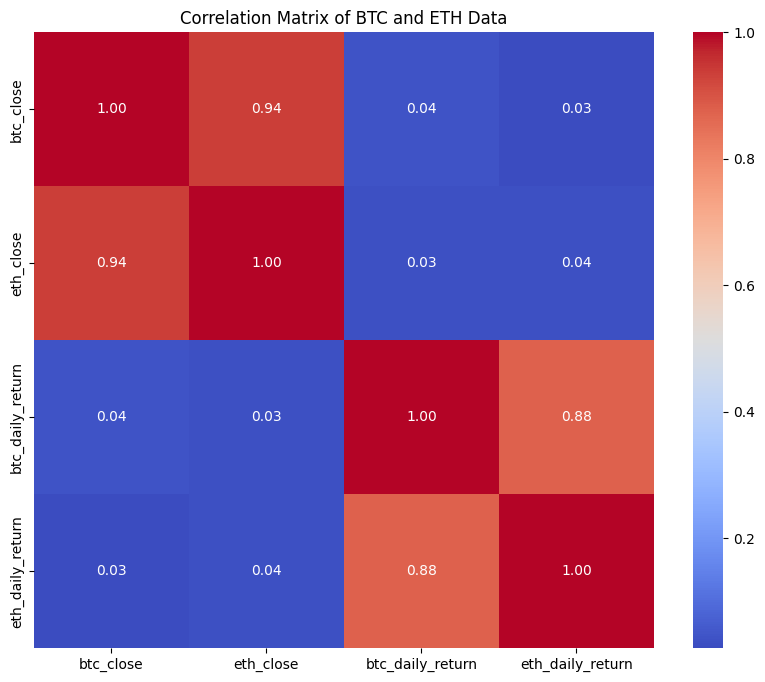

In [29]:
# Calculating and visualizing the correlation matrix
correl_columns = ['btc_close','eth_close','btc_daily_return','eth_daily_return']
correlation_matrix = df[correl_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of BTC and ETH Data')
plt.show()

In [30]:
# functions to setup lagged features for user-defined number of days

def lag_returns(df, lags):
  lagged_columns = []
  for i in range(1 , lags + 1):
    df['btc_lag_returns_'+str(i)] = df['btc_daily_return'].shift(i)
    df['eth_lag_returns_'+str(i)] = df['eth_daily_return'].shift(i)
    lagged_columns.append('eth_lag_returns_'+str(i))
    lagged_columns.append('btc_lag_returns_'+str(i))
  return lagged_columns

def lag_vol(df, lags):
  lagged_columns = []
  for i in range(1 , lags + 1):
    df['eth_lag_vol_'+str(i)] = df['eth_volatility'].shift(i)
    df['btc_lag_vol_'+str(i)] = df['btc_volatility'].shift(i)
    lagged_columns.append('btc_lag_vol_'+str(i))
    lagged_columns.append('eth_lag_vol_'+str(i))
  return lagged_columns

In [31]:
lag_ret_columns = lag_returns(df, 2)
lag_vol_columns = lag_vol(df, 2)
pd.set_option('display.max_columns', None)
df.dropna(inplace = True)
df.head()

,timestamp,btc_open,btc_high,btc_low,btc_close,btc_volume,btc_wavg_price,btc_count,eth_open,eth_high,eth_low,eth_close,eth_volume,eth_wavg_price,eth_count,btc_daily_return,eth_daily_return,btc_volatility,eth_volatility,btc_lag_returns_1,eth_lag_returns_1,btc_lag_returns_2,eth_lag_returns_2,eth_lag_vol_1,btc_lag_vol_1,eth_lag_vol_2,btc_lag_vol_2
32,2022-01-10,41867.1,42239.6,39659.9,41855.3,41104.0,4131.282282,29925,3150.86,3180.30,2931.53,3084.65,3037.70,42048.826482,27371,-0.000182,-0.021150,0.027760,0.031887,0.004070,0.023103,0.004084,-0.036481,0.033424,0.029253,0.033842,0.029225
33,2022-01-11,41855.2,43127.5,41315.5,42728.8,42374.3,3316.849061,27218,3083.49,3264.43,3054.64,3240.40,3173.60,37211.476760,25045,0.020870,0.050492,0.027924,0.033510,-0.000182,-0.021150,0.004070,0.023103,0.031887,0.027760,0.033424,0.029253
34,2022-01-12,42728.8,44348.5,42480.0,43927.8,43529.2,2847.971732,25374,3240.39,3412.64,3206.93,3373.77,3313.14,24087.804359,18939,0.028061,0.041158,0.025920,0.031321,0.020870,0.050492,-0.000182,-0.021150,0.033510,0.027924,0.031887,0.027760
35,2022-01-13,43927.8,44420.1,42352.0,42550.0,43331.8,2960.067418,25407,3373.74,3411.92,3233.64,3241.84,3324.88,30612.408171,25881,-0.031365,-0.039105,0.025470,0.031638,0.028061,0.041158,0.020870,0.050492,0.031321,0.025920,0.033510,0.027924
36,2022-01-14,42550.0,43473.1,41800.0,43090.0,42821.3,2711.961121,24161,3241.84,3342.00,3191.17,3309.67,3269.84,29531.985587,22635,0.012691,0.020923,0.025526,0.030833,-0.031365,-0.039105,0.028061,0.041158,0.031638,0.025470,0.031321,0.025920


In [32]:
# Select Features and Target
features = lag_ret_columns + lag_vol_columns
target_btc = 'btc_daily_return'
target_eth = 'eth_daily_return'

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
# Train-Test Split
train, test = train_test_split(df, test_size=0.3, shuffle=False, random_state = 0)

In [35]:
# Train Linear Regression model

model_btc = model_eth = LinearRegression()

model_btc.fit(train[features], train[target_btc])

model_btc.fit(train[features], train[target_eth])

LinearRegression()

In [36]:
# Predictions for BTC
test['btc_pred_returns'] = model_btc.predict(test[features])
test['eth_pred_returns'] = model_eth.predict(test[features])

In [37]:
# Obtain trading signal based on prediction
# Long for +ve predicted return and Short for -ve predicted return
test['btc_position'] = [1 if i > 0 else -1 for i in test['btc_pred_returns']]
test['eth_position'] = [1 if i > 0 else -1 for i in test['eth_pred_returns']]

#Ca
test['btc_strat_return'] = test['btc_position'] * test['btc_daily_return']
test['eth_strat_return'] = test['eth_position'] * test['eth_daily_return']

In [38]:
# Cumulative Returns
test['cumulative_btc_strategy_returns'] = (1 + test['btc_strat_return']).cumprod() - 1
test['cumulative_eth_strategy_returns'] = (1 + test['eth_strat_return']).cumprod() - 1
test['cumulative_btc_market_returns'] = (1 + test['btc_daily_return']).cumprod() - 1
test['cumulative_eth_market_returns'] = (1 + test['eth_daily_return']).cumprod() - 1

test.set_index('timestamp', inplace= True)
df.set_index('timestamp', inplace= True)

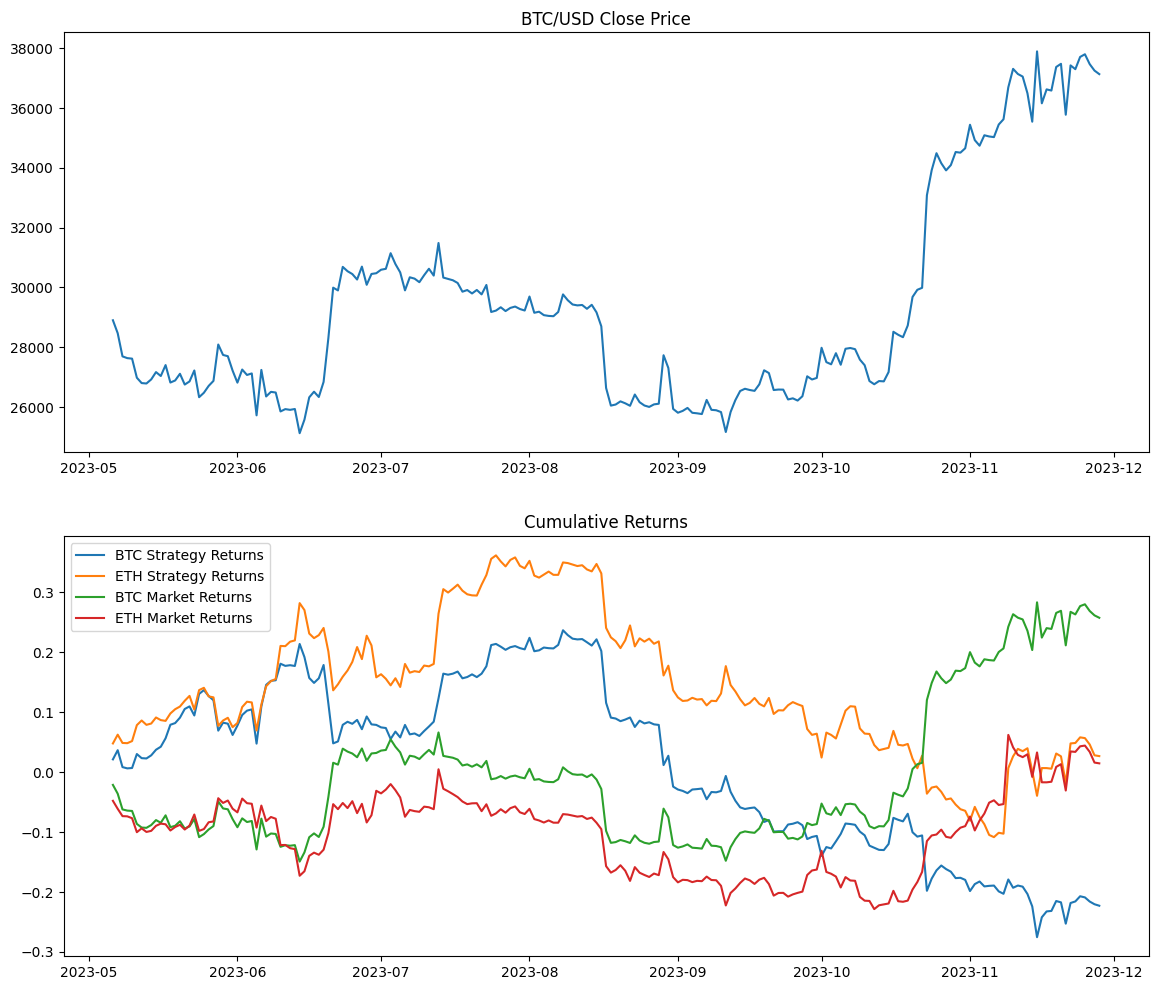

In [39]:
# Visualization
plt.figure(figsize=(14, 12))

plt.subplot(2, 1, 1)
plt.plot(test['btc_close'], label='BTC/USD Close Price')
plt.title('BTC/USD Close Price')

plt.subplot(2, 1, 2)
plt.plot(test['cumulative_btc_strategy_returns'], label='BTC Strategy Returns')
plt.plot(test['cumulative_eth_strategy_returns'], label='ETH Strategy Returns')
plt.plot(test['cumulative_btc_market_returns'], label='BTC Market Returns')
plt.plot(test['cumulative_eth_market_returns'], label='ETH Market Returns')
plt.title('Cumulative Returns')

plt.legend()
plt.show()

In [40]:
# Performance Metrics

#analyse winning and losing trads
btc_total_trades = sum(test['btc_position'].diff() != 0)
eth_total_trades = sum(test['eth_position'].diff() != 0)

btc_winning_trades, btc_losing_trades = trade_returns(test['btc_position'], test['btc_strat_return'])
eth_winning_trades, eth_losing_trades = trade_returns(test['eth_position'], test['eth_strat_return'])

eth_winrate = eth_winning_trades/eth_total_trades
btc_winrate = btc_winning_trades/btc_total_trades

print("BTC Total Trades:   ", btc_total_trades)
print("BTC Winning Trades: ", btc_winning_trades)
print("BTC Losing Trades:  ", btc_losing_trades)
print(f"BTC Win Rate:       {btc_winrate: 0.3f}")
print()
print("ETH Total Trades:   ", eth_total_trades)
print("ETH Winning Trades: ", eth_winning_trades)
print("ETH Losing Trades:  ", eth_losing_trades)
print(f"ETH Win Rate:       {eth_winrate: 0.3f}")

BTC Total Trades:    86
BTC Winning Trades:  22
BTC Losing Trades:   64
BTC Win Rate:        0.256

ETH Total Trades:    86
ETH Winning Trades:  21
ETH Losing Trades:   65
ETH Win Rate:        0.244


In [41]:
#average asset and strategy returns and volatility
average_btc_daily_return = test['btc_daily_return'].mean()
average_btc_strategy_return = test['btc_strat_return'].mean()
average_eth_daily_return = test['eth_daily_return'].mean()
average_eth_strategy_return = test['eth_strat_return'].mean()

btc_volatility = test['btc_daily_return'].std()
btc_strategy_volatility = test['btc_strat_return'].std()
eth_volatility = test['eth_daily_return'].std()
eth_strategy_volatility = test['eth_strat_return'].std()

#sharpe ratio
btc_sharpe_ratio = (average_btc_strategy_return / btc_strategy_volatility) * np.sqrt(365)
eth_sharpe_ratio = (average_eth_strategy_return / eth_strategy_volatility) * np.sqrt(365)

In [42]:
#max drawdown
cumulative_btc_return = (1 + test['btc_strat_return']).cumprod()
cumulative_eth_return = (1 + test['eth_strat_return']).cumprod()

btc_peak = cumulative_btc_return.cummax()
eth_peak = cumulative_eth_return.cummax()

btc_drawdown = (cumulative_btc_return / btc_peak - 1).min()
eth_drawdown = (cumulative_eth_return / eth_peak - 1).min()

#compounded annual growth rate
def calculate_cagr(returns):
    total_return = np.prod([x+1 for x in returns])
    num_years = len(returns) / 365  # Assuming daily returns
    cagr = (total_return ** (1 / num_years)) - 1
    return cagr

btc_cagr = calculate_cagr(test['btc_strat_return'])
eth_cagr = calculate_cagr(test['eth_strat_return'])

#calmar ratio
calmar_ratio_btc = -btc_cagr / btc_drawdown
calmar_ratio_eth = -eth_cagr / eth_drawdown

#sortino ratio
downside_returns_btc = test['btc_strat_return'][test['btc_strat_return'] < 0]
downside_returns_eth = test['eth_strat_return'][test['eth_strat_return'] < 0]

sortino_ratio_btc = (btc_cagr / downside_returns_btc.std()) if downside_returns_btc.std() != 0 else np.nan
sortino_ratio_eth = (eth_cagr / downside_returns_eth.std()) if downside_returns_eth.std() != 0 else np.nan

### Understanding Performance Matrics

1. **Sharpe Ratio:** Measures risk-adjusted returns.
* Positive Value: Generally considered acceptable.
* Above 1: Indicates a good risk-adjusted return.
* Above 2: Indicates an excellent risk-adjusted return.

2. **Maximum Drawdown:** Quantifies the largest peak-to-trough decline in a strategy's equity.
* Below 20%: Generally considered acceptable.
* Below 10%: Indicates a lower risk profile.
* Below 5%: Indicates a very low risk profile.

3. **Calmar Ratio:** Ratio of average annual return to maximum drawdown.
* Above 1: Indicates an acceptable risk-return profile.
* Above 2: Indicates a good risk-return profile.
* Above 3: Indicates an excellent risk-return profile.

4. **Sortino Ratio:** Measures risk-adjusted returns, focusing on downside volatility.
* Positive Value: Indicates an acceptable risk-adjusted return.
* Above 1: Indicates a good risk-adjusted return.
* Above 2: Indicates an excellent risk-adjusted return.

### Refer to these to get a better understanding:
- https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2662054
- https://www.optimizedportfolio.com/risk-adjusted-return/

In [43]:
print(f"BTC Sharpe Ratio:      {btc_sharpe_ratio: 0.3f}")
print(f"BTC Maximum Drawdown:  {btc_drawdown: 0.3f}")
print(f"BTC CAGR:              {btc_cagr: 0.3f}")
print(f"BTC Calmar Ratio:      {calmar_ratio_btc: 0.3f}")
print(f"BTC Sortino Ratio:     {sortino_ratio_btc: 0.3f}")
print()
print(f"ETH Sharpe Ratio:      {eth_sharpe_ratio: 0.3f}")
print(f"ETH Maximum Drawdown:  {eth_drawdown: 0.3f}")
print(f"ETH CAGR:              {eth_cagr: 0.3f}")
print(f"ETH Calmar Ratio:      {calmar_ratio_eth: 0.3f}")
print(f"ETH Sortino Ratio:     {sortino_ratio_eth: 0.3f}")

BTC Sharpe Ratio:      -0.966
BTC Maximum Drawdown:  -0.414
BTC CAGR:              -0.359
BTC Calmar Ratio:      -0.867
BTC Sortino Ratio:     -19.689

ETH Sharpe Ratio:       0.315
ETH Maximum Drawdown:  -0.345
ETH CAGR:               0.048
ETH Calmar Ratio:       0.138
ETH Sortino Ratio:      3.299


## Sourcing strategy ideas

Our goal on the algorithmic trading research projects is to establish a strategy pipeline that will provide us with a stream of ongoing trading ideas. Ideally we want to create a methodical approach to sourcing, evaluating and implementing strategies that we come across.

#### Textbooks
* Quantitative Trading: How to Build Your Own Algorithmic Trading Business by Ernest Chan
* Algorithmic Trading: Winning Strategies and Their Rationale by Ernest Chan

#### The Internet

* **Quant Blogs**
MATLAB Trading - http://matlab-trading.blogspot.co.uk/,
Quantopian - http://blog.quantopian.com,
Quantpedia - http://quantpedia.com
* **Aggregators**
Quantocracy - http://www.quantocracy.com,
Quant News - http://www.quantnews.com,
Algo Trading Sub-Reddit - http://www.reddit.com/r/algotrading
* **Forums**
Elite Trader Forums - http://www.elitetrader.com,
Nuclear Phynance - http://www.nuclearphynance.com, QuantNet - http://www.quantnet.com

### Journal Literature
* **arXiv** - http://arxiv.org/archive/q-fin
* **SSRN** - http://www.ssrn.com
* **Journal of Investment Strategies** - http://www.risk.net/type/journal/source/journal-of-investment-strategies
* **Journal of Computational Finance** - http://www.risk.net/type/journal/source/journal-of-computational-finance
* **Mathematical Finance** - http://onlinelibrary.wiley.com/journal/10.1111/%28ISSN%291467-9965

### Independent Research (our ideal outcome)
* Market microstructure
* Fund structure
* Machine learning/artificial intelligence


##### Author: Aaryan Gulia